<a href="https://colab.research.google.com/github/jennadb/Derivative-Pricing/blob/main/projet_derivatives_pricing_Modif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Range accrual under Vasicek model or CIR model

In [1]:
#import library
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pylab as plt
from random import gauss
from scipy.stats import norm
import pandas as pd

### Perform the pricing using a Monte-Carlo approach, providing with a confidence interval

The payoff of range accrual at time T (maturity date) is defined as follow:
$$ P_T = \frac{P}{N}\sum_{i=1}^N 1_{index(i) \in Range}$$

Where
$N = Trading \; days$

$ P = Notional$


Pricing this financial productio under Vasicek model is defined as follow:
$$P_0 = E\left[e^{-\int_{0}^{T} r_t dt} \frac{P}{N}\sum_{i=1}^{N}1_{index(i) \in Range}\right] $$

In [2]:
def confidence_interval_95(liste,x,nb_of_sims):
    x_std = np.std(liste)
    return [x - 1.96*x_std/np.sqrt(nb_of_sims), x + 1.96*x_std/np.sqrt(nb_of_sims)]

In [3]:
def VasicekRangeAccrualByMC(t,k,K1,K2,N,P,theta,sigma,r,nbSimul,nbSteps):
    dt = (N-t) / nbSteps 
    std = sigma * np.sqrt( (1 - np.exp(-2*k*dt)) / (2*k) )
    myMCestimate = []
    for i in range(nbSimul):
        spotRate = r
        integralSpotRate = 0
        RA_payoff = 0 # initialize the payoff of range accrual
        indic = 0 #indicatrice
        for j in range(nbSteps):
            integralSpotRate += spotRate #to compute the integral of the short rate process
            spotRate = spotRate * np.exp(-k*dt) + theta * (1 - np.exp(-k*dt)) + std * gauss(0.0,1.0)
            integralSpotRate *= dt
            if(K1<= spotRate and spotRate<=K2):
                indic += 1
        integralSpotRate *= dt
        RA_payoff = P/N*indic#range accrual payoff
        myMCestimate.append(np.exp(-integralSpotRate) * RA_payoff)

    Price = np.mean(myMCestimate)
    CI = confidence_interval_95(myMCestimate,Price,nbSimul)
    return  Price,CI

In [4]:
nbSimul = 10000
nbSteps = 100
N = 1/12 #trading days
P = 1 #Notional
K1 = 0.03 #1st index in the range
K2 = 0.05 #last index in the range
k = 0.5
theta = 0.04 #long term value of interest rate
sigma = 0.015
r = 0.02
t = 0

print(f'Price of range accrual under Vasicek: {VasicekRangeAccrualByMC(t,k,K1,K2,N,P,theta,sigma,r,nbSimul,nbSteps)[0]}')
print(f'Confidence interval: {VasicekRangeAccrualByMC(t,k,K1,K2,N,P,theta,sigma,r,nbSimul,nbSteps)[1]}')

Price of range accrual under Vasicek: 3.5639999224711283
Confidence interval: [3.8271540420240306, 5.352845755548643]


In [ ]:
# comment about the price and CI:
# 
# 

Plotting the price of the range accrual with respect to the underlying 

Text(0, 0.5, 'Range accrual price')

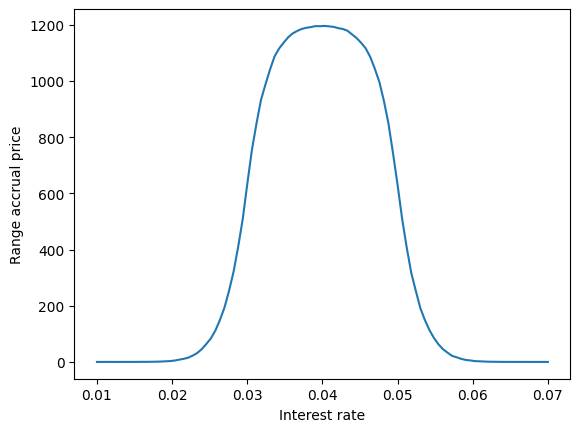

In [5]:
# range of initial interest rates to plot
rates = np.linspace(0.01, 0.07, 100)

# list to store prices
prices = []

# compute prices for each initial interest rate value
for rate in rates:
    price = VasicekRangeAccrualByMC(t, k, K1, K2, N, P, theta, sigma, rate, nbSimul, nbSteps)[0]
    prices.append(price)

# plot results
plt.plot(rates, prices)
plt.xlabel('Interest rate')
plt.ylabel('Range accrual price')


### Provide with the 1st and 2nd order price function sensitivity with respect to parallel movements of the initial ZC bond rate curve.


In [ ]:
def FirstOrderSensitivity(t,k,K1,K2,N,P,theta,sigma,r,nbSimul,nbSteps, eps):
    P1 = VasicekRangeAccrualByMC(t,k,K1,K2,N,P,theta,sigma,r+eps,nbSimul,nbSteps)[0]
    P2 =  VasicekRangeAccrualByMC(t,k,K1,K2,N,P,theta,sigma,r-eps,nbSimul,nbSteps)[0]
    return (P1-P2)/(2*eps)

In [ ]:
def SecondOrderSensitivity(t,k,K1,K2,N,P,theta,sigma,r,nbSimul,nbSteps, eps):
    P1 = VasicekRangeAccrualByMC(t,k,K1,K2,N,P,theta,sigma,r+eps,nbSimul,nbSteps)[0]
    P2 = 2*VasicekRangeAccrualByMC(t,k,K1,K2,N,P,theta,sigma,r,nbSimul,nbSteps)[0]
    P3 = VasicekRangeAccrualByMC(t,k,K1,K2,N,P,theta,sigma,r-eps,nbSimul,nbSteps)[0]
    return (P1 - P2 + P3)/(eps)**2

In [ ]:
nbSimul = 10000
nbSteps = 100
N = 1/12
P = 1
K1 = 0.03
K2 = 0.05
k = 0.5
theta = 0.04 #long term value of interest rate
sigma = 0.015
r = 0.02
t = 0
eps = 0.01
print(FirstOrderSensitivity(t,k,K1,K2,N,P,theta,sigma,r,nbSimul,nbSteps, eps))
print(SecondOrderSensitivity(t,k,K1,K2,N,P,theta,sigma,r,nbSimul,nbSteps, eps))

In [ ]:
# comment the two sensitivities :
#
#


In [ ]:
# comment on the possibility to hedge the risks and how:
# 
# 

### Calibrate the interest rate model on the initial ZC bond value curve, extracted from the market

In [ ]:
""" Extracting ZC from a Market Curve """
path = r"IRMarketCurve.xlsx" 
book = pd.read_excel(path)

In [ ]:
xl = pd.ExcelFile(path)
d = []
for sheet_name in xl.sheet_names:
    df = xl.parse(sheet_name, index_col=None)
    d.append(df)
sheet = d[0]

In [ ]:
IRCurve = []
for row_index in range(len(sheet)):
    row= ""
    Lign = []
    for col in sheet.columns:
        value = sheet.at[row_index, col]
        Lign.append(value)
    IRCurve.append(Lign)

print(len(IRCurve))

In [ ]:
def extractZCCurve(IRCurve):# We need to modify this part tomorrow
   
    ZC = []
    
    for i in range(4): # The formula is valid for all rates with maturity < 1yr
        maturity = IRCurve[i+1][0] # beware of the indices
        ZCrate = IRCurve[i+1][2] 
        ZCvalue = 1.0/(1+maturity*ZCrate)
        ZC.append([maturity,ZCrate,ZCvalue]) #to store both ZCRate at Value
    #sumOfZC = 0#zc value of maturity 1y
    sumOfZC = 1/(1+IRCurve[4][2])#zc value of maturity 1y
    for i in range(4,len(IRCurve)-1): # For swaps with maturity >= 2yr
        #sumOfZC +=...
        maturity = IRCurve[i+1][0]
        ZCvalue = (1-IRCurve[i+1][2]*sumOfZC)/(1 + IRCurve[i+1][2])#"To be filled" 
        ZCrate =ZCvalue**(-10/maturity)-1.0 #"To be filled" 
        ZC.append([maturity,ZCrate,ZCvalue]) #to store both ZCRate at Value
        sumOfZC += ZCvalue
        
    ZC = np.array(ZC) #to transform the list in np.array
    return ZC

ZCCurve = extractZCCurve(IRCurve)
#print(ZCCurve)

In [ ]:
IRCurveShifted = [IRCurve[0]]
for i in range(1,33):
    IRCurveShifted.append([IRCurve[i][0],IRCurve[i][1],IRCurve[i][2]+0.01])
ZCCurveShifted = extractZCCurve(IRCurveShifted)
#print(ZCCurveShifted)

In [ ]:
def VasicekZCPrice(t,T,k,theta,sigma,rt):
    B = (1-np.exp(-k*(T-t)))/k# ~ (T-t)
    A =  np.exp((theta -0.5*sigma**2/k**2)*(B-T + t)-(0.25*sigma**2/k)*B**2)
    ZC = A * np.exp(-B*rt)
    return ZC

In [ ]:
def LossFunction(param,ZCMarket,T): 
    #param>> vasicek model parameter
    #ZCmarket is the ZC Bond value observed in the market(will be a list)
    #T corresponding to the maturity(will be a list)
    
    log_k = param[0] # exponential transformation for a parameter
    theta = param[1]
    sigma = param[2]
    r = param[3]
    #t is time today and it is 0
    #k should be positive that's why np.exp(log_k) = k
    L = 0
    for i in range(len(ZCMarket)):
        L += (ZCMarket[i] - VasicekZCPrice(0,T[i],np.exp(log_k),theta,sigma,r))**2
    return [L,0,0,0] #For the function root to work, the return type should have the 
    #same length as the parameters

In [ ]:
from scipy.optimize import root
initParam = [np.log(k),theta,sigma,r]
calib = root(LossFunction, initParam, (ZCCurve[:,2],ZCCurve[:,0]))
calibParam = [np.exp(calib.x[0]),calib.x[1],calib.x[2],calib.x[3]]
print(calibParam)


## Calibration parameter

We run the code by using the parameter obtained in the calibration parameter. We notice that there is a difference between the price obtained with the initial parameter and the one with calibration.

In [ ]:
nbSimul = 10000
nbSteps = 100
N = 1/12#trading day
P = 1#Notional
K1 = 0.03 #1st index in the range
K2 = 0.05#last index in the range
k = 0.07882985347854438 #k obtained in calibration parameter
theta = 0.039998108271029675 #long term value of interest rate
sigma = 0.01473292400940012
r = 0.019434960812328282
t = 0

print(f'Price of range accrual under Vasicek: {VasicekRangeAccrualByMC(t,k,K1,K2,N,P,theta,sigma,r,nbSimul,nbSteps)[0]}')
print(f'Confidence interval: {VasicekRangeAccrualByMC(t,k,K1,K2,N,P,theta,sigma,r,nbSimul,nbSteps)[1]}')

In [ ]:
nbSimul = 10000
nbSteps = 100
N = 1/12#trading day
P = 1#Notional
K1 = 0.03 #1st index in the range
K2 = 0.05#last index in the range
k = 0.07882985347854438 #k obtained in calibration parameter
theta = 0.039998108271029675 #long term value of interest rate
sigma = 0.01473292400940012
r = 0.019434960812328282
t = 0
eps = 0.01
print(FirstOrderSensitivity(t,k,K1,K2,N,P,theta,sigma,r,nbSimul,nbSteps, eps))
print(SecondOrderSensitivity(t,k,K1,K2,N,P,theta,sigma,r,nbSimul,nbSteps, eps))